Fetching Stock Price data using Yfinance

In [1]:
import yfinance as yf
import pandas as pd

# Choose a stock symbol (e.g., Apple - AAPL)
ticker = "AAPL"
data = yf.download(ticker, start="2022-01-01", end="2025-01-01")

# Save to CSV
data.to_csv("aapl_stock_data.csv")

print(data.head())


C:\Users\INCREDIBLE\AppData\Local\Temp\ipykernel_5100\4234837600.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2022-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.443115  179.296076  174.227395  174.345039  104487900
2022-01-04  176.178406  179.354917  175.609770  179.050994   99310400
2022-01-05  171.492065  176.639180  171.217554  176.090157   94537600
2022-01-06  168.629288  171.864620  168.276342  169.315567   96904000
2022-01-07  168.795975  170.727370  167.678316  169.501866   86709100


Data Cleaning & Preprocessing

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 753 entries, 2022-01-03 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   753 non-null    float64
 1   (High, AAPL)    753 non-null    float64
 2   (Low, AAPL)     753 non-null    float64
 3   (Open, AAPL)    753 non-null    float64
 4   (Volume, AAPL)  753 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.3 KB
None


In [4]:
print(data.isnull().sum())

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


In [5]:
#Ensuring correct data types
print(data.dtypes)

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object


In [6]:
data.to_csv("aapl_stock_data_cleaned.csv")

Plotting the Graph of closing price over time

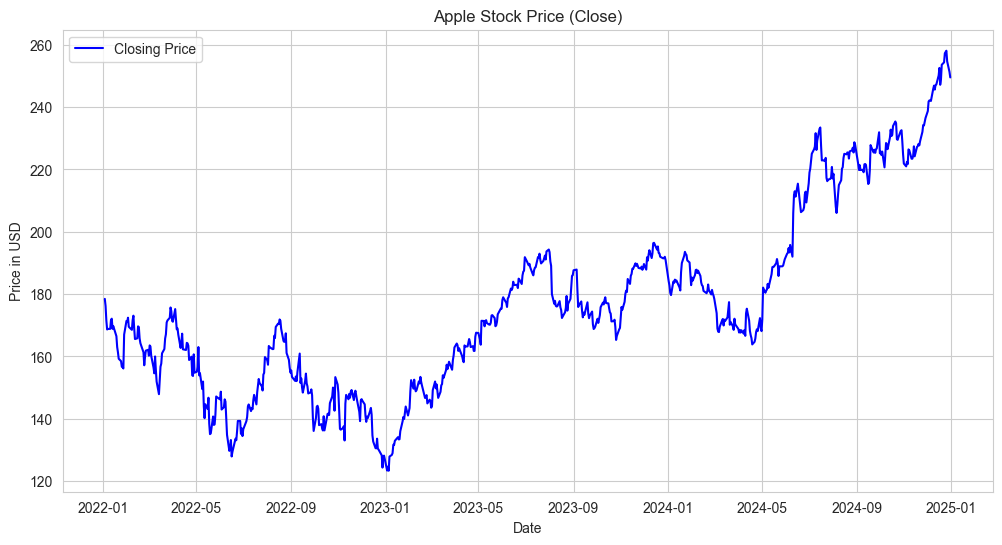

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], label="Closing Price", color="blue")
plt.title("Apple Stock Price (Close)")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()
plt.show()


Add Moving Averages (Technical Analysis)

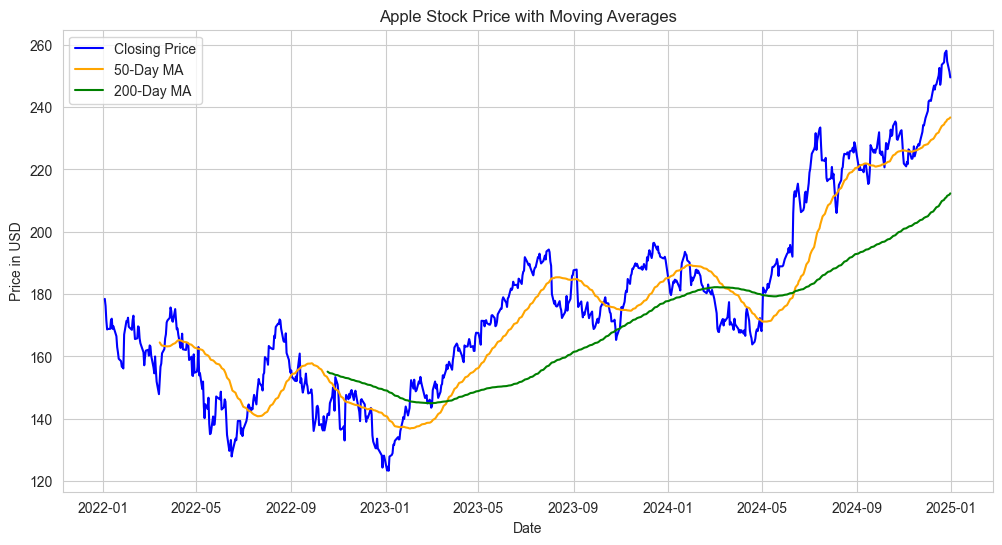

In [9]:
data["MA50"] = data["Close"].rolling(window=50).mean()
data["MA200"] = data["Close"].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Close"], label="Closing Price", color="blue")
plt.plot(data.index, data["MA50"], label="50-Day MA", color="orange")
plt.plot(data.index, data["MA200"], label="200-Day MA", color="green")
plt.title("Apple Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()
plt.show()


Plotting the Daily Price Change

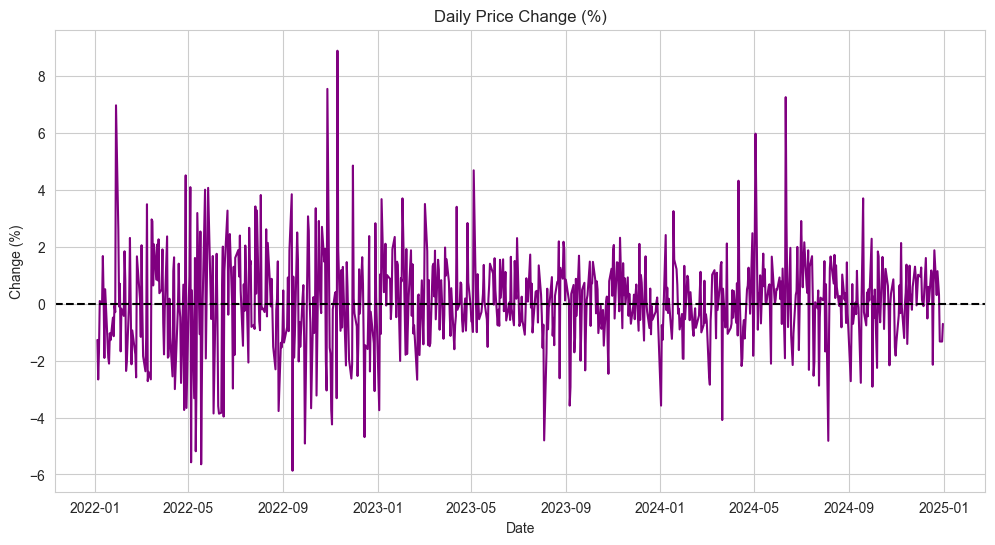

In [10]:
data["Daily Change %"] = data["Close"].pct_change() * 100

plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Daily Change %"], color="purple")
plt.title("Daily Price Change (%)")
plt.xlabel("Date")
plt.ylabel("Change (%)")
plt.axhline(0, color="black", linestyle="--")
plt.show()


Creating Interactive Closing Price Chart

In [11]:
import plotly.graph_objects as go

fig = go.Figure()

# Closing Price
fig.add_trace(go.Scatter(
    x=data.index,
    y=data["Close"],
    mode="lines",
    name="Close Price",
    line=dict(color="blue")
))

fig.update_layout(
    title="Apple Stock Price (Interactive)",
    xaxis_title="Date",
    yaxis_title="Price in USD",
    template="plotly_white"
)

fig.show()


Add Moving Averages

In [12]:
fig.add_trace(go.Scatter(
    x=data.index,
    y=data["MA50"],
    mode="lines",
    name="50-Day MA",
    line=dict(color="orange")
))
fig.add_trace(go.Scatter(
    x=data.index,
    y=data["MA200"],
    mode="lines",
    name="200-Day MA",
    line=dict(color="green")
))

fig.show()


Adding Volume as Bar Chart

In [13]:
fig.add_trace(go.Bar(
    x=data.index,
    y=data["Volume"],
    name="Volume",
    marker_color="lightgrey",
    opacity=0.4,
    yaxis="y2"
))

fig.update_layout(
    yaxis2=dict(
        title="Volume",
        overlaying="y",
        side="right"
    )
)

fig.show()


Deploying The Dashboard with StreamLit

In [14]:
#Create the Dashboard Script
import streamlit as st
import yfinance as yf
import pandas as pd
import plotly.graph_objects as go

st.set_page_config(page_title="Stock Price Dashboard", layout="wide")

st.title("📈 Stock Price Visualization Dashboard")

# Sidebar for user input
st.sidebar.header("Settings")
ticker = st.sidebar.text_input("Stock Symbol", value="AAPL")
start_date = st.sidebar.date_input("Start Date", pd.to_datetime("2023-01-01"))
end_date = st.sidebar.date_input("End Date", pd.to_datetime("today"))

# Fetch data
data = yf.download(ticker, start=start_date, end=end_date)
data["MA50"] = data["Close"].rolling(window=50).mean()
data["MA200"] = data["Close"].rolling(window=200).mean()

# Price chart
fig = go.Figure()
fig.add_trace(go.Scatter(x=data.index, y=data["Close"], mode="lines", name="Close Price", line=dict(color="blue")))
fig.add_trace(go.Scatter(x=data.index, y=data["MA50"], mode="lines", name="50-Day MA", line=dict(color="orange")))
fig.add_trace(go.Scatter(x=data.index, y=data["MA200"], mode="lines", name="200-Day MA", line=dict(color="green")))
fig.update_layout(title=f"{ticker} Stock Price", xaxis_title="Date", yaxis_title="Price (USD)", template="plotly_white")

st.plotly_chart(fig, use_container_width=True)

# Volume chart
st.subheader("Volume Traded")
st.bar_chart(data["Volume"])


2025-08-17 09:08:32.721 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 09:08:32.722 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 09:08:33.575 
  command:

    streamlit run C:\Users\INCREDIBLE\AppData\Roaming\Python\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-17 09:08:33.575 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 09:08:33.577 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 09:08:33.577 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 09:08:33.579 Thread 'MainThread': missing ScriptRunContext! This warning 

DeltaGenerator()

In [ ]:
#Run the DashBoard


2025-08-17 09:08:58.663 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 09:08:58.664 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 09:08:58.665 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 09:08:58.666 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 09:08:58.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 09:08:58.668 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 09:08:58.669 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-17 09:08:58.670 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()